## DynamicEarthnet Challenge

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import random
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

def pltclusters(imadfile,emfile,num=500,clusters=None):
    ''' Make a 3d plot of two em clusters '''
    # read the first 3 iMAD bands into array imad and classified image into array em
    gdal.AllRegister()
    inDataset = gdal.Open(imadfile,GA_ReadOnly)
    cols = inDataset.RasterXSize
    rows = inDataset.RasterYSize    
    bands = inDataset.RasterCount
    imad = np.zeros((rows*cols,3))
    for b in range(3):
        band = inDataset.GetRasterBand(b+1)
        imad[:,b] = band.ReadAsArray(0,0,cols,rows).astype(float).ravel()
    inDataset = None    
    inDataset = gdal.Open(emfile,GA_ReadOnly)
    band = inDataset.GetRasterBand(1)
    em = band.ReadAsArray(0,0,cols,rows).ravel()
    inDataset = None
    k = np.max(em)
    if clusters==None:
        clusters = range(0,min(5,k))
    else:
        for i in range(len(clusters)):
            clusters[i] -= 1 
    fig = plt.figure(figsize=(10, 8))
    ax = p3.Axes3D(fig)  
    ax.set_xlabel('MAD1')
    ax.set_ylabel('MAD2')
    ax.set_zlabel('MAD3')
    colors = ['black','red','green','cyan','blue']
    labels = ['no change','change2','change3','change4','change5']
    alpha = [1,0.4,0.4,0.4,0.4]
    for i in clusters:       
        idx = np.where(em==(i+1))[0]       
        random.shuffle(idx)      
        idx = idx[:num]
        ax.scatter(imad[idx,0], imad[idx,1], imad[idx,2], alpha=alpha[i], s=10, c=colors[i], label=labels[i])
    plt.title('iMAD clusters')
    plt.legend(loc=2)
    plt.show()  

### Sentitnel 2 Costa Rica

In [73]:
ls imagery/dynearthnet/2196_3885_13/

2196_3885_13_2018_01.tif
2196_3885_13_2018_02.tif
2196_3885_13_2018_03.tif
2196_3885_13_2018_04.tif
2196_3885_13_2018_05.tif
2196_3885_13_2018_06.tif
2196_3885_13_2018_07.tif
2196_3885_13_2018_08.tif
2196_3885_13_2018_09.tif
2196_3885_13_2018_10.tif
2196_3885_13_2018_11.tif
2196_3885_13_2018_12.tif
2196_3885_13_2019_01.tif
2196_3885_13_2019_02.tif
2196_3885_13_2019_03.tif
2196_3885_13_2019_04.tif
2196_3885_13_2019_05.tif
2196_3885_13_2019_06.tif
2196_3885_13_2019_07.tif
2196_3885_13_2019_08.tif
2196_3885_13_2019_09.tif
2196_3885_13_2019_10.tif
2196_3885_13_2019_11.tif
2196_3885_13_2019_12.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap_em.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif


### First two images

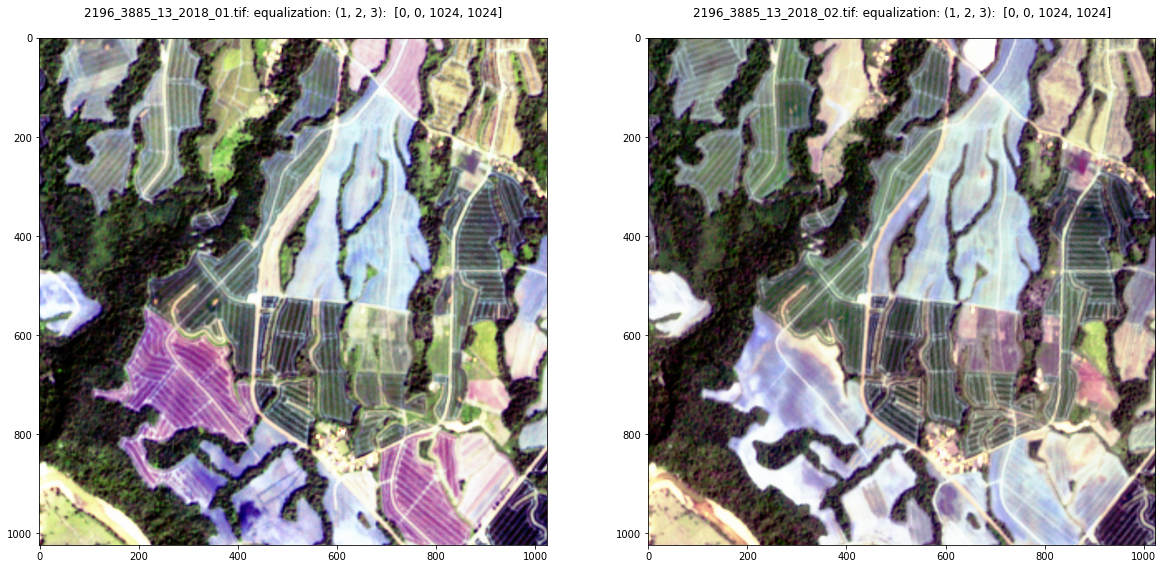

<Figure size 432x288 with 0 Axes>

In [2]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif  -e 4 -p [1,2,3] \
-F imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif -E 4 -P [1,2,3]

### Run iMAD on all 10 bands

In [11]:
%run scripts/iMad_tf imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif \
imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif

------------IRMAD (tensorflow) -------------
Fri Mar 19 16:37:33 2021
first scene:  imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif
second scene: imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif
canonical corr: tf.Tensor(
[0.99959457 0.9966792  0.9685296  0.94688359 0.91951861 0.87358692
 0.84859405 0.69343634 0.55461667 0.51062497], shape=(10,), dtype=float64)
MAD variates written to: imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
elapsed time: 35.375462770462036


### Threshold change at 0.0001

In [8]:
%run scripts/iMadmap imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif 0.0001

change map written to: imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif


### Display first  MAD band

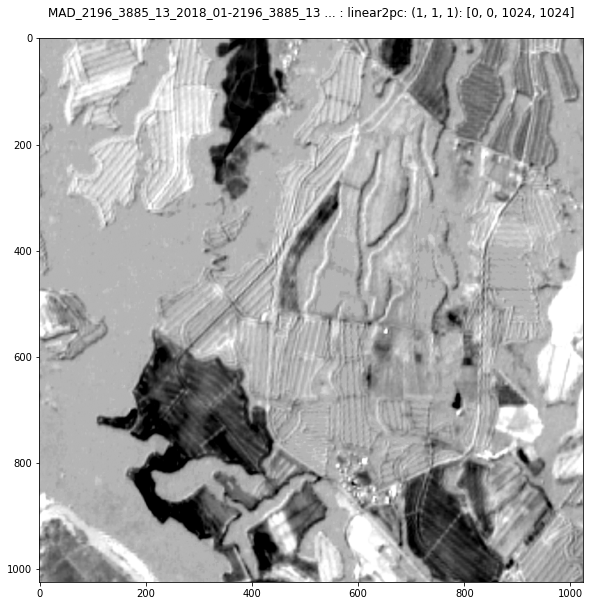

<Figure size 432x288 with 0 Axes>

In [9]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif \
-e 3 -p [1,1,1]

### Run EM clustering on all 10 MADs  with 4 clusters (11th band is chisqr)

In [14]:
%run scripts/em -K 5 -p [1,2,3,4,5,6,7,8,9,10] imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif

--------------------------
     EM clustering
--------------------------
infile:   imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
clusters: 5
T0:       0.500000
beta:     0.500000
scale:    2
running EM on 65536 pixel vectors
em iteration 0: dU: 0.938852 loglike: -118099.321261
em iteration 10: dU: 0.951446 loglike: -17034.801124
em iteration 20: dU: 0.790100 loglike: -13888.318349
em iteration 30: dU: 0.616381 loglike: -13810.745196
em iteration 40: dU: 0.650285 loglike: -13771.660845
em iteration 50: dU: 0.157418 loglike: -13742.113862
em iteration 60: dU: 0.007137 loglike: -13718.890440
em iteration 70: dU: 0.006292 loglike: -13699.805766
em iteration 80: dU: 0.005547 loglike: -13683.451114
em iteration 90: dU: 0.005247 loglike: -13668.968480
em iteration 100: dU: 0.004982 loglike: -13655.783274
em iteration 110: dU: 0.004771 loglike: -13643.531843
em iteration 120: dU: 0.004498 loglike: -13632.003955
em iteration 130: dU: 0.004197 loglike: -13621

### Display the change map

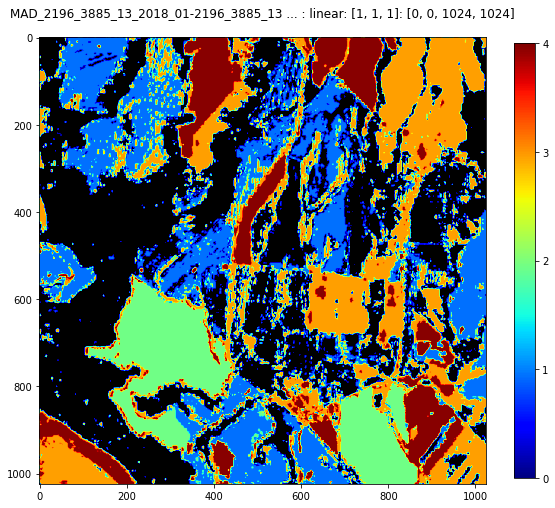

<Figure size 432x288 with 0 Axes>

In [15]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif -c

### 3D scatterplot of the change clusters. Black cluster (no change) is obscured

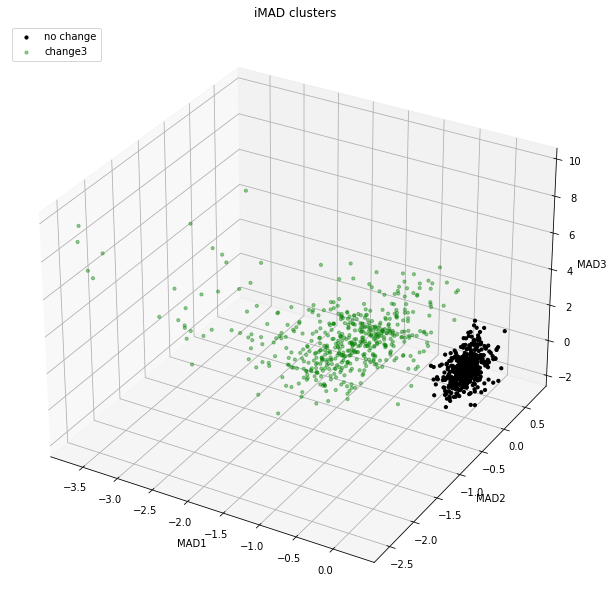

In [16]:
pltclusters('imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif', 
            'imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif',num = 500,clusters=[1,3])    

## Planet O'Brien

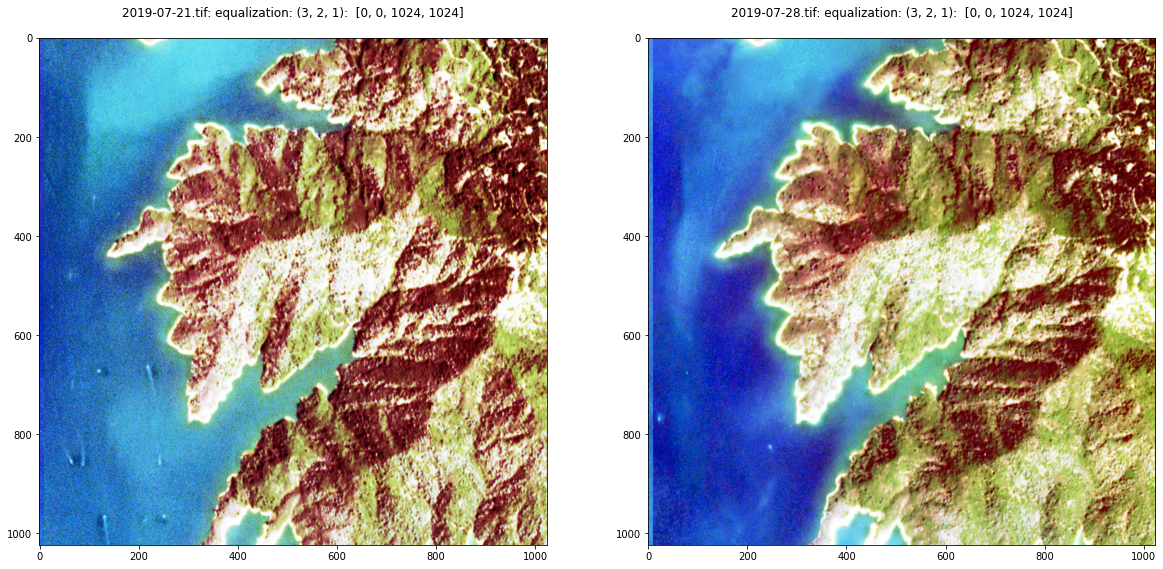

<Figure size 432x288 with 0 Axes>

In [17]:
%run scripts/dispms -f /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-21.tif -e 4 -p [3,2,1] \
-F /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-28.tif -E 4 -P [3,2,1]

In [18]:
%run scripts/iMad_tf  /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-21.tif \
/media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-28.tif

------------IRMAD (tensorflow) -------------
Fri Mar 19 16:49:54 2021
first scene:  /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-21.tif
second scene: /media/mort/Crucial/imagery/dynearthnet/L3H-SR/2019-07-28.tif
canonical corr: tf.Tensor([0.99985021 0.9814598  0.92165597 0.83800338], shape=(4,), dtype=float64)
MAD variates written to: /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28.tif
elapsed time: 14.13035535812378


In [19]:
%run scripts/iMadmap /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28.tif 0.0001

change map written to: /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28_cmap.tif


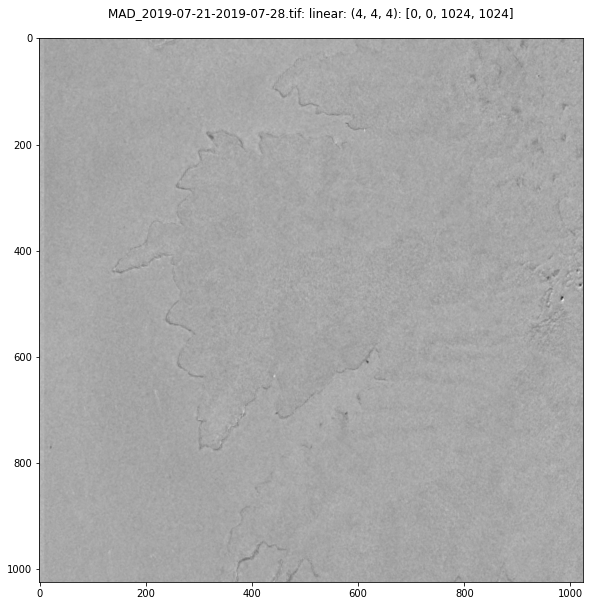

<Figure size 432x288 with 0 Axes>

In [20]:
%run scripts/dispms -f /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28.tif \
-e 2 -p [4,4,4]

In [28]:
%run scripts/em -K 2 -p [1,2,3,4] /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28.tif

--------------------------
     EM clustering
--------------------------
infile:   /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28.tif
clusters: 2
T0:       0.500000
beta:     0.500000
scale:    2
running EM on 65536 pixel vectors
em iteration 0: dU: 0.993802 loglike: -54700.226549
em iteration 10: dU: 0.949461 loglike: -13260.835682
em iteration 20: dU: 0.962493 loglike: -4821.811216
em iteration 30: dU: 0.456689 loglike: -4375.317241
em iteration 40: dU: 0.534143 loglike: -4352.838391
em iteration 50: dU: 0.021752 loglike: -4350.408433
running EM on 262144 pixel vectors
em iteration 0: dU: 0.898632 loglike: -46695.599183
running EM on 1048576 pixel vectors
em iteration 0: dU: 0.899100 loglike: -120633.002941
Cluster mean vectors
[[-1.01910574e-02  7.04699247e-04 -1.02689347e-01  3.39294815e-02]
 [-4.32206450e-02  3.76192361e-01 -7.17700579e-01 -6.83462455e-01]]
Cluster covariance matrices
cluster: 0
[[ 0.01436644 -0.0017316   0.04696711  0.00814682]
 [-0.0017

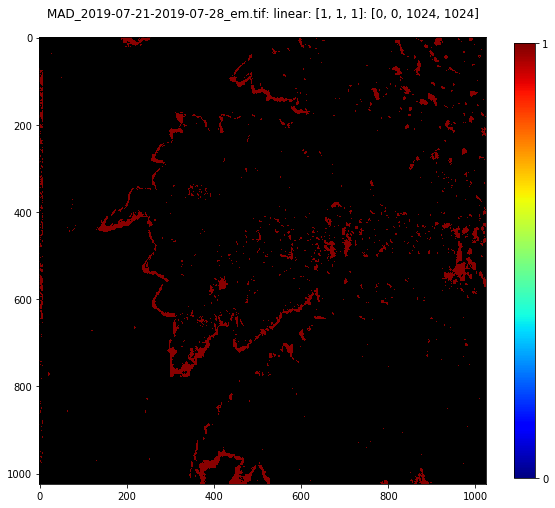

In [29]:
%run scripts/dispms -f /media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28_em.tif -c

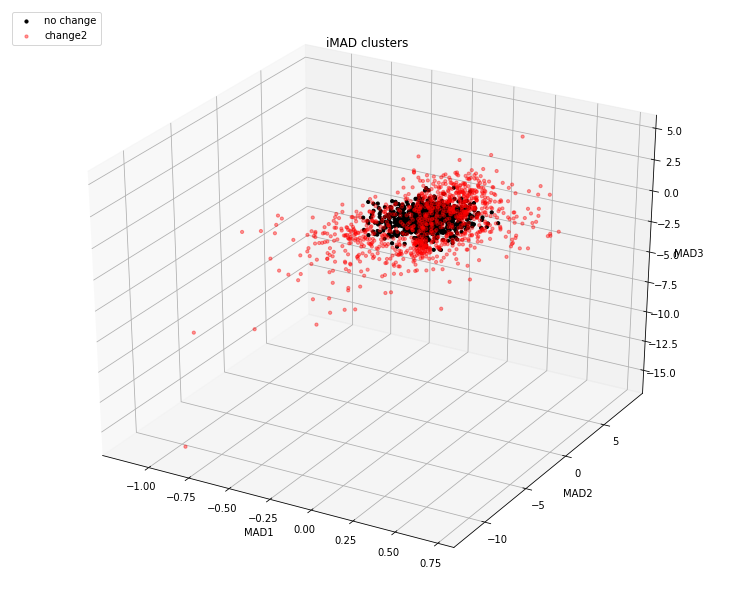

In [30]:
pltclusters('/media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28.tif', 
            '/media/mort/Crucial/imagery/dynearthnet/L3H-SR/MAD_2019-07-21-2019-07-28_em.tif',num = 1000)